# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

In [338]:
# mostrar todas as colunas
pd.set_option("display.max_columns", None)

In [339]:
train_data = pd.read_csv("./data/train.csv")
data = pd.read_csv("./data/RHP_data.csv")

train_data = data.merge(train_data, on="Id", how="right")


In [340]:
train_data.head(5)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,19.0,11/07/05,13/12/99,5.79,SB,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
1,17249,32.0,0,NaN,12/02/04,10/06/92,12.11,GS,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,NaN,Anormal
2,4483,13.0,87,17.0,22/12/03,05/11/01,2.21,SulAmerica,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
3,6830,11.0,0,NaN,11/12/06,26/05/05,1.6,SA,Normais,NaN,NaN,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
4,11652,42.4,136,23.0,23/03/01,03/03/01,0.06,NaN,Normais,100.0,60.0,Não Calculado,Normal,ausente,78,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal


#### Após carregas os dados, iremos fazer uma breve análise do que cada uma das colunas representa.

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. 

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. 

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

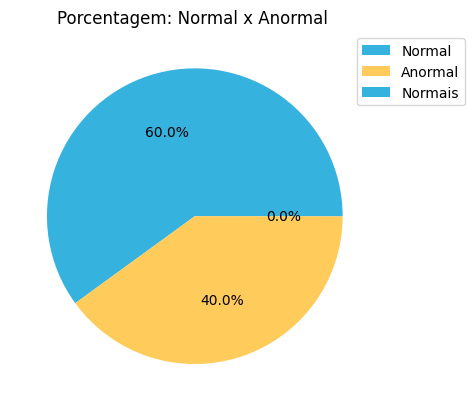

In [341]:

colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [342]:
print(f"Quantidade de amostras Normais: {sum(train_data['CLASSE'] == 'Normal')}")
print(f"Quantidade de amostras Anormais: {sum(train_data['CLASSE'] == 'Anormal')}")

Quantidade de amostras Normais: 8137
Quantidade de amostras Anormais: 5421


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [343]:
substituir(train_data, "CLASSE", "Normais", "Normal")

In [344]:
normal_data = train_data[train_data["CLASSE"] == "Normal"]

In [345]:
normal_data["nan_count"] = normal_data.isna().sum(axis=1)
normal_data = normal_data.sort_values(by="nan_count", ascending=False)

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_25848\3752332633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data["nan_count"] = normal_data.isna().sum(axis=1)


In [346]:
normal_data_reduced = normal_data.iloc[0:2716,:]

In [347]:
train_data = train_data[~train_data["Id"].isin(normal_data_reduced["Id"])]

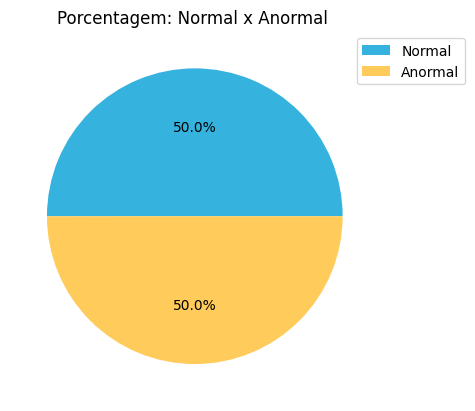

In [348]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [349]:
train_data = train_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [350]:
converter_numeric(train_data, "FC")
converter_numeric(train_data, "IDADE")

In [351]:
train_data.loc[train_data["Peso"] <= 0, "Peso"] = np.nan

In [352]:
train_data.loc[train_data["Altura"] <= 40, "Altura"] = np.nan

In [353]:
train_data.loc[(train_data["IDADE"] <= 0) | (train_data["IDADE"] > 19), "IDADE"] = np.nan

In [354]:
train_data.loc[
    (train_data["PA SISTOLICA"] > 140) | (train_data["PA SISTOLICA"] < 80), "PA SISTOLICA"
] = np.nan

In [355]:
train_data.loc[(train_data["PA DIASTOLICA"] < 40) | (train_data['PA DIASTOLICA'] > 100), "PA DIASTOLICA"] = np.nan

In [356]:
train_data.loc[(train_data["FC"] > 220) | (train_data["FC"] < 50), "FC"] = np.nan

In [357]:
train_data["PA DIASTOLICA"] = fill_na_mediana(train_data, "PA DIASTOLICA")
train_data["PA SISTOLICA"] = fill_na_mediana(train_data, "PA SISTOLICA")
train_data["FC"] = fill_na_mediana(train_data, "FC")

In [358]:
train_data["Peso"] = fill_na_mediana(train_data, "Peso")
train_data["Altura"] = fill_na_mediana(train_data, "Altura")
train_data["IDADE"] = fill_na_mediana(train_data, "IDADE")

In [359]:
altura_aux = train_data["Altura"] / 100


train_data["IMC"] = train_data["Peso"] / np.power(altura_aux, 2)

In [360]:
substituir(train_data, "PULSOS", "NORMAIS", "Normais")
substituir(train_data, "PULSOS", "AMPLOS", "Amplos")

In [361]:
substituir(train_data, "SOPRO", "sistólico", "Sistólico")
substituir(train_data, "SOPRO", "contínuo", "Contínuo")

In [362]:
substituir(train_data, "SEXO", "Masculino", "M")
substituir(train_data, "SEXO", "masculino", "M")

substituir(train_data, "SEXO", "Feminino", "F")

In [363]:
train_data["PULSOS"] = train_data["PULSOS"].fillna(train_data["PULSOS"].mode()[0])

In [364]:
train_data = train_data.dropna(subset=["B2"])

In [365]:
train_data = train_data.dropna(subset=["HDA 1"])

In [366]:
train_data["HDA2"] = train_data["HDA2"].fillna("Assintomático")

In [367]:
train_data = train_data.dropna(subset=["SEXO"])

In [368]:
train_data = train_data.dropna(subset=["MOTIVO1"])

In [369]:
train_data["MOTIVO2"] = train_data["MOTIVO2"].fillna(train_data['MOTIVO2'].mode()[0])

In [370]:
train_data["PPA"] = train_data["PPA"].replace("#VALUE!", np.nan)

In [371]:
train_data["PPA"] = train_data["PPA"].fillna(train_data["PPA"].mode()[0])

In [372]:
train_data = train_data.dropna(subset=["CLASSE"])

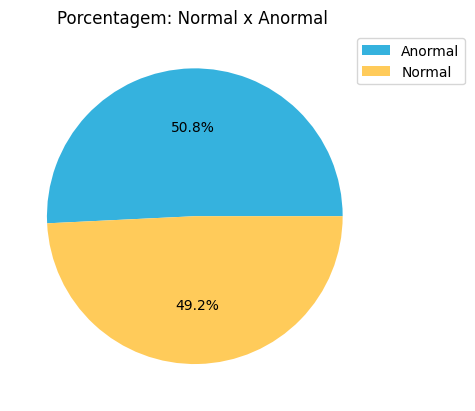

In [373]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

#### Dados teste

In [374]:
test_data = pd.read_csv("./data/test.csv")
data2 = pd.read_csv("./data/RHP_data.csv")

test_data = data2.merge(test_data, on="Id", how="right")


In [375]:
converter_numeric(test_data, "FC")
converter_numeric(test_data, "IDADE")

In [376]:
test_data["PA DIASTOLICA"] = fill_na_mediana(test_data, "PA DIASTOLICA")
test_data["PA SISTOLICA"] = fill_na_mediana(test_data, "PA SISTOLICA")
test_data["FC"] = fill_na_mediana(test_data, "FC")

In [377]:
test_data["Peso"] = fill_na_mediana(test_data, "Peso")
test_data["Altura"] = fill_na_mediana(test_data, "Altura")
test_data["IDADE"] = fill_na_mediana(test_data, "IDADE")

In [378]:
test_data.loc[test_data["Peso"] <= 0, "Peso"] = test_data["Peso"].median()

In [379]:
altura_invalida = test_data[test_data["Altura"] <= 40]

test_data.loc[altura_invalida.index, "Altura"] = test_data["Altura"].median()

In [380]:
idade_invalida = test_data[(test_data["IDADE"] <= 0) | (test_data['IDADE'] > 19)]
test_data.loc[idade_invalida.index, "IDADE"] = test_data["IDADE"].median()

In [381]:
test_data.loc[
    (test_data["PA SISTOLICA"] > 140) | (test_data["PA SISTOLICA"] < 80), "PA SISTOLICA"
] = test_data["PA SISTOLICA"].median()

In [382]:
test_data.loc[
    (test_data["PA DIASTOLICA"] < 40) | (test_data["PA DIASTOLICA"] > 100),
    "PA DIASTOLICA",
] = test_data["PA DIASTOLICA"].median()

In [383]:
test_data.loc[(test_data["FC"] > 220) | (test_data["FC"] < 50), "FC"] = test_data[
    "FC"
].median()

In [384]:
altura_aux = test_data["Altura"] / 100


test_data["IMC"] = test_data["Peso"] / np.power(altura_aux, 2)

In [385]:
test_data = test_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [386]:
substituir(test_data, "PULSOS", "NORMAIS", "Normais")
substituir(test_data, "PULSOS", "AMPLOS", "Amplos")

In [387]:
substituir(test_data, "SOPRO", "sistólico", "Sistólico")
substituir(test_data, "SOPRO", "contínuo", "Contínuo")

In [388]:
substituir(test_data, "SEXO", "Masculino", "M")
substituir(test_data, "SEXO", "masculino", "M")

substituir(test_data, "SEXO", "Feminino", "F")

In [389]:
test_data["PULSOS"] = test_data["PULSOS"].fillna(test_data["PULSOS"].mode()[0])

In [390]:
test_data["B2"] = test_data["B2"].fillna(test_data["B2"].mode()[0])

In [391]:
test_data["SOPRO"] = test_data["SOPRO"].fillna(test_data["SOPRO"].mode()[0])

In [392]:
test_data["SEXO"] = test_data["SEXO"].fillna(test_data["SEXO"].mode()[0])

In [393]:
test_data["MOTIVO1"] = test_data["MOTIVO1"].fillna(test_data["MOTIVO1"].mode()[0])
test_data["MOTIVO2"] = test_data["MOTIVO2"].fillna(test_data["MOTIVO2"].mode()[0])

In [394]:
test_data["PPA"] = test_data["PPA"].replace("#VALUE!", np.nan)
test_data["PPA"] = test_data["PPA"].fillna(test_data["PPA"].mode()[0])

In [395]:
test_data["HDA 1"] = test_data["HDA 1"].fillna("Assintomático")
test_data["HDA2"] = test_data["HDA2"].fillna("Assintomático")

#### Encoder

In [396]:
dados = pd.DataFrame(pd.concat([train_data, test_data], axis=0))

In [397]:
from sklearn.preprocessing import LabelEncoder

In [398]:
le = LabelEncoder()

In [399]:
dados["SOPRO"] = le.fit_transform(dados["SOPRO"])

In [400]:
dados['SOPRO ALTURA'] = (dados['SOPRO'] + 1) * dados['Altura']

In [401]:
colunas = [
    "PULSOS",
    "PPA",
    "B2",
    "SOPRO",
    "HDA 1",
    "HDA2",
    "SEXO",
    "MOTIVO1",
    "MOTIVO2",
]

In [402]:
dados = pd.get_dummies(dados, columns=colunas)

#### Normalização

In [403]:
from sklearn.preprocessing import StandardScaler

In [404]:
colunas_a_normalizar = [
    "Peso",
    "Altura",
    "IMC",
    "IDADE",
    "PA SISTOLICA",
    "PA DIASTOLICA",
    "FC",
    'SOPRO ALTURA'
]

In [405]:

ids = dados["Id"].to_numpy()
classes = dados["CLASSE"].to_numpy()

In [406]:
dados = dados.drop(columns=["Id", "CLASSE"])

In [407]:
colunas_a_normalizar = [
    "Peso",
    "Altura",
    "IMC",
    "IDADE",
    "PA SISTOLICA",
    "PA DIASTOLICA",
    "FC",
]

In [408]:
scaler = StandardScaler()
dados[colunas_a_normalizar] = scaler.fit_transform(dados[colunas_a_normalizar])

In [409]:
dados

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,SOPRO ALTURA,PULSOS_Amplos,PULSOS_Diminuídos,PULSOS_Femorais diminuidos,PULSOS_Normais,PULSOS_Outro,PPA_HAS-1 PAD,PPA_HAS-1 PAS,PPA_HAS-2 PAD,PPA_HAS-2 PAS,PPA_Normal,PPA_Não Calculado,PPA_Pre-Hipertensão PAD,PPA_Pre-Hipertensão PAS,B2_Desdob fixo,B2_Hiperfonética,B2_Normal,B2_Outro,B2_Única,SOPRO_0,SOPRO_1,SOPRO_2,SOPRO_3,SOPRO_4,HDA 1_Assintomático,HDA 1_Cianose,HDA 1_Desmaio/tontura,HDA 1_Dispneia,HDA 1_Dor precordial,HDA 1_Ganho de peso,HDA 1_Outro,HDA 1_Palpitacao,HDA2_Assintomático,HDA2_Cianose,HDA2_Desmaio/tontura,HDA2_Dispneia,HDA2_Dor precordial,HDA2_Ganho de peso,HDA2_Outro,HDA2_Palpitacao,SEXO_F,SEXO_Indeterminado,SEXO_M,MOTIVO1_1 - Cardiopatia já estabelecida,MOTIVO1_2 - Check-up,MOTIVO1_5 - Parecer cardiológico,MOTIVO1_6 - Suspeita de cardiopatia,MOTIVO1_7 - Outro,MOTIVO2_1 - Cardiopatia adquirida,MOTIVO2_1 - Cardiopatia congenica,MOTIVO2_5 - Atividade física,MOTIVO2_5 - Cirurgia,MOTIVO2_5 - Uso de cisaprida,MOTIVO2_6 - Alterações de pulso/perfusão,MOTIVO2_6 - Cansaço,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro
0,0.178415,0.320912,0.075946,-0.172103,1.118210,2.622367,0.480905,492.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0.424131,0.156985,0.567101,1.235035,-0.050181,-0.193697,0.480905,354.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,-0.743021,-0.859364,-0.070288,-0.969184,-0.050181,-0.193697,0.480905,261.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,1.222709,1.566758,-0.049967,0.230890,2.286600,1.214335,-0.754761,644.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8,-0.067301,-0.039728,0.144568,-0.287880,-0.050181,-0.193697,0.480905,448.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,-0.405161,-0.367582,-0.003734,0.250929,-0.050181,1.214335,-1.249027,408.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,Tru

In [410]:
dados["Id"] = ids
dados["CLASSE"] = classes
dados["CLASSE"] = dados["CLASSE"].map({"Normal": 0, "Anormal": 1})

In [411]:
dados

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,SOPRO ALTURA,PULSOS_Amplos,PULSOS_Diminuídos,PULSOS_Femorais diminuidos,PULSOS_Normais,PULSOS_Outro,PPA_HAS-1 PAD,PPA_HAS-1 PAS,PPA_HAS-2 PAD,PPA_HAS-2 PAS,PPA_Normal,PPA_Não Calculado,PPA_Pre-Hipertensão PAD,PPA_Pre-Hipertensão PAS,B2_Desdob fixo,B2_Hiperfonética,B2_Normal,B2_Outro,B2_Única,SOPRO_0,SOPRO_1,SOPRO_2,SOPRO_3,SOPRO_4,HDA 1_Assintomático,HDA 1_Cianose,HDA 1_Desmaio/tontura,HDA 1_Dispneia,HDA 1_Dor precordial,HDA 1_Ganho de peso,HDA 1_Outro,HDA 1_Palpitacao,HDA2_Assintomático,HDA2_Cianose,HDA2_Desmaio/tontura,HDA2_Dispneia,HDA2_Dor precordial,HDA2_Ganho de peso,HDA2_Outro,HDA2_Palpitacao,SEXO_F,SEXO_Indeterminado,SEXO_M,MOTIVO1_1 - Cardiopatia já estabelecida,MOTIVO1_2 - Check-up,MOTIVO1_5 - Parecer cardiológico,MOTIVO1_6 - Suspeita de cardiopatia,MOTIVO1_7 - Outro,MOTIVO2_1 - Cardiopatia adquirida,MOTIVO2_1 - Cardiopatia congenica,MOTIVO2_5 - Atividade física,MOTIVO2_5 - Cirurgia,MOTIVO2_5 - Uso de cisaprida,MOTIVO2_6 - Alterações de pulso/perfusão,MOTIVO2_6 - Cansaço,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro,Id,CLASSE
0,0.178415,0.320912,0.075946,-0.172103,1.118210,2.622367,0.480905,492.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,10524,0.0
1,0.424131,0.156985,0.567101,1.235035,-0.050181,-0.193697,0.480905,354.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,17249,1.0
2,-0.743021,-0.859364,-0.070288,-0.969184,-0.050181,-0.193697,0.480905,261.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4483,1.0
5,1.222709,1.566758,-0.049967,0.230890,2.286600,1.214335,-0.754761,644.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,15430,0.0
8,-0.067301,-0.039728,0.144568,-0.287880,-0.050181,-0.193697,0.480905,448.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,14309,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,-0.405161,-0.367582,-0.003734,0.250929,-0.050181,1.214335,-1.249027,408.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,

#### Separação para treinamento

In [412]:
X = train_data.iloc[:, 1:-1]

y = train_data.iloc[:, -1]

X_test = test_data.iloc[:, 1:]

In [413]:
X_train = pd.DataFrame(train_data["Id"])

X_train = dados[dados["Id"].isin(X_train["Id"])]

In [414]:
X_test = pd.DataFrame(test_data["Id"])

X_test = dados[dados["Id"].isin(X_test["Id"])]

In [415]:
y = X_train["CLASSE"]
X = X_train.drop(columns=["Id", "CLASSE", 'Altura'])
X_t = X_test.drop(columns=["Id", "CLASSE", 'Altura'])

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [416]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [417]:
from sklearn.ensemble import RandomForestClassifier

In [418]:
import random

In [419]:
model = RandomForestClassifier(n_estimators=300, random_state=random.randint(0,1000))

In [420]:
scores = cross_val_score(model, X, y, cv=10)

In [421]:
print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.77%
Desvio padrão da acurácia: 0.39%


In [422]:
for i in scores:
    print(f"{(i * 100):.2f}%")

94.05%
93.56%
93.33%
93.44%
93.33%
94.40%
94.40%
93.92%
93.80%
93.44%


In [423]:
modelo_rf = RandomForestClassifier(n_estimators=300, random_state=42)

In [424]:
modelo_rf.fit(X,y)

RandomForestClassifier(n_estimators=300, random_state=42)

In [425]:
predicao_random_forest = modelo_rf.predict_proba(X_t)

In [426]:
resultado_pred_random_forest = pd.DataFrame(test_data["Id"], columns=["Id"])
resultado_pred_random_forest["Predicted"] = predicao_random_forest[:, 1]

display(resultado_pred_random_forest)

,Id,Predicted
0,8957,0.713333
1,4246,0.033333
2,9089,0.206667
3,10606,0.506667
4,9863,0.070000
...,...,...
3141,14053,0.143333
3142,9000,0.966667
3143,14643,0.976667
3144,15107,0.993333


In [427]:
resultado_pred_random_forest.to_csv(
    "./resultados/previsao_random_forest_one_hot_encoding.csv", index=False
)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.